In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

plt.rcParams['agg.path.chunksize'] = 10000

%matplotlib inline

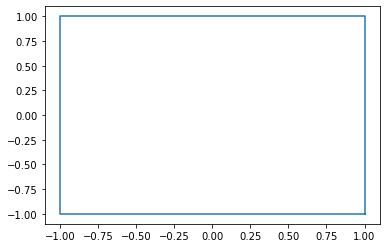

In [3]:
def square(halfside):
    
    return [[halfside, halfside, -halfside, -halfside, halfside],
            [-halfside, halfside, halfside, -halfside, -halfside]]

plt.figure()
plt.plot(square(1)[0],square(1)[1])

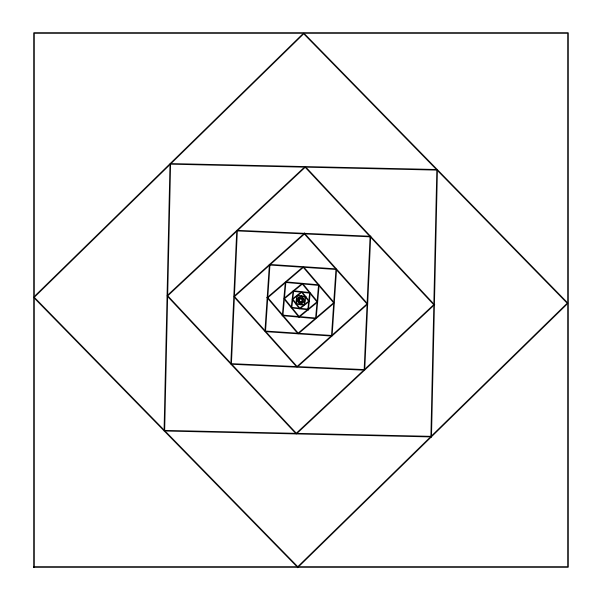

In [15]:
fps = 60
vidlength = 3
nframes = fps*vidlength


fractions = np.linspace(0,1,nframes,endpoint=False)
fractions = np.append(fractions[int(nframes/2):],fractions[:int(nframes/2)])

maxdepth = 800
mindistsq = 1e-4


maincolor = np.array([195/360, 1, 1])

fig = plt.figure(figsize=(10.80,10.80))
fig.patch.set_alpha(1)
fig.tight_layout()
ax = plt.gca()
ax.set_xlim(-1.05,1.05)
ax.set_ylim(-1.05,1.05)
ax.set_aspect('equal')
ax.axis('off')

for frame, fraction in enumerate(fractions):
    
    ax.cla()
    ax.axis('off')
    
    prevpoints = np.array([[-1,-1],
                       [1,-1],
                       [1,1],
                       [-1,1]])
    plotpoints = np.vstack((prevpoints,prevpoints[0]))
    plt.plot(plotpoints[:,0],plotpoints[:,1],'k')
    
    currentdepth = 0
    
    thiscolor = hsv_to_rgb(maincolor*np.array([1,1,np.cos(np.pi*fraction)*np.cos(np.pi*fraction)]))
    
    while np.dot(prevpoints[0],prevpoints[0]) > mindistsq and currentdepth < maxdepth:

        nextpoints = np.array([prevpoints[i] + fraction*(prevpoints[(i+1)%4]-prevpoints[i]) for i in range(4)])
        
        plotpoints = np.vstack((nextpoints,nextpoints[0]))
        ax.plot(plotpoints[:,0],plotpoints[:,1],color='k')

        prevpoints = nextpoints[:]
        currentdepth += 1
    
    fig.savefig('animation/twisty-square%04d.png'%frame,dpi=100)
    print('Frame',frame+1,' of',nframes,end='\r')

plt.show()

a = np.array([0,1,2,3,4,5,6,7])
print(a[4:])
print(a[:4])
print(fractions)

In [10]:
0.49444444 + 0.00555556

0.5